In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA
import numpy as np

In [5]:
# Get tweets csv data and drop irrelevant columns
local_path='/Users/user/Desktop/Tweet_Data/combined.csv'
df = pd.read_csv(local_path) 
df = vader_tweet_sentiment(df).drop(['location', 'name', 'username'], axis=1)

In [6]:
# Shorten the column names
df=df.rename(columns={'public_metrics_following_count': 'following_count', 
                      'public_metrics_followers_count': 'followers_count',
                     'public_metrics_retweet_count': 'retweet_count',
                     'public_metrics_like_count': 'like_count',
                     'public_metrics_quote_count': 'quote_count',
                     'public_metrics_reply_count': 'reply_count',
                     'public_metrics_tweet_count': 'tweet_count',
                     'public_metrics_listed_count': 'listed_count'})
df.head()

,author_id,created_at,entities_cashtags,entities_hashtags,entities_urls,tweet_id,possibly_sensitive,like_count,quote_count,reply_count,...,profile_image_url,followers_count,following_count,listed_count,tweet_count,media_type,Compound_vader,Positive_vader,Negative_vader,Neutral_vader
0,1352775243899826177,2021-09-30 19:57:22,NaN,NaN,NaN,1443726697791213568,False,0,0,0,...,https://pbs.twimg.com/profile_images/142723282...,340,384,5,13572,NaN,0.5766,0.427,0.0,0.573
1,1413223598148530179,2021-09-30 19:55:37,"LUNA,","Terra,","pic.twitter.com/vcV9uCij7X,",1443726256663666693,False,0,0,0,...,https://pbs.twimg.com/profile_images/141358471...,475,848,18,817,photo,0.8436,0.188,0.0,0.812
2,2555034025,2021-09-30 19:52:26,NaN,NaN,NaN,1443725456566538245,False,0,0,0,...,https://pbs.twimg.com/profile_images/475661580...,7,3,0,4994,NaN,0.0000,0.000,0.0,1.000
3,94727634,2021-09-30 19:50:59,NaN,NaN,"pic.twitter.com/hhM1vWtiCL,",1443725090634416150,False,12,0,0,...,https://pbs.twimg.com/profile_images/144538128...,500,588,9,316155,photo,0.0000,0.000,0.0,1.000
4,3788850554,2021-09-30 19:49:36,NaN,NaN,NaN,1443724744004550659,False,0,0,1,...,https://pbs.twimg.com/profile_images/144885900...,3,14,0,7470,NaN,0.5106,0.355,0.0,0.645


In [7]:
# Get the length of each text, number of hashtags, and number of stocks
df['text_length'] = df['text'].apply(len)
#df['stocks_mentioned_count']=df['Mentioned_stocks_S&P500'].apply(len)+df['Mentioned_stocks_S&P500'].apply(len)
#df['hashtag_count']= df['hashtag'].apply(len)

#Convert string types to float type
df['followers_count']=pd.to_numeric(
    df['followers_count'],errors='coerce')

df['following_count']=pd.to_numeric(
    df['following_count'],errors='coerce')

df['retweet_count']=pd.to_numeric(
    df['following_count'],errors='coerce')

df['like_count']=pd.to_numeric(
    df['like_count'],errors='coerce')

df['quote_count']=pd.to_numeric(
    df['quote_count'],errors='coerce')

## Number of Followers and Following Effects on Popularity
In the below subsection, we explore the number of followings and number of followers statistics. Moreover, we visualize and study the underlying effects that each has respectively on the resulting popularity of the tweet. In particular, we study the effects of the number of followers, the number of followings, the ratio between the two, and the interdependent relationship on popularity metrics.

Text(0.5, 0, 'Number of followings')

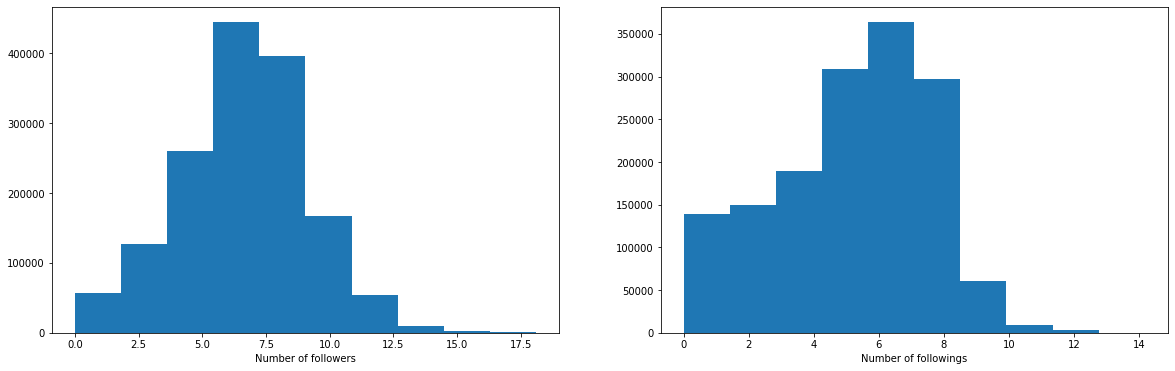

In [14]:
#Histogram plots of followers and following counts on log scale
fig, ax = plt.subplots(1,2, figsize=(20, 6))
ax[0].hist(df['followers_count'].apply(lambda x: np.log(1+x)))
ax[0].set_xlabel("Number of followers")

ax[1].hist(df['following_count'].apply(lambda x: np.log(1+x)))
ax[1].set_xlabel("Number of followings")

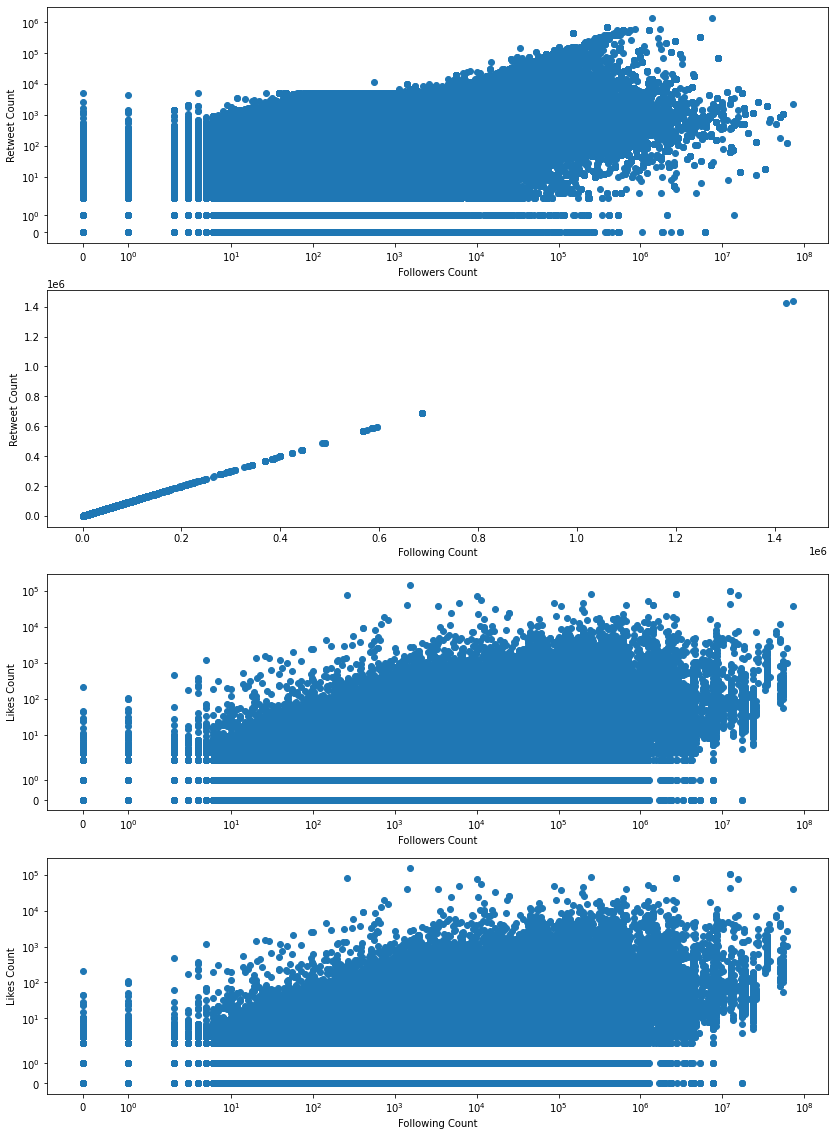

In [72]:
#Plot number of followers vs retweet count and vs likes count
fig, ax = plt.subplots(4, figsize=(14, 20))

ax[0].scatter(df['followers_count'],df['retweet_count'])
ax[0].set_xlabel("Followers Count")
ax[0].set_ylabel("Retweet Count")
ax[0].set_yscale('symlog')
ax[0].set_xscale('symlog')

ax[1].scatter(df['following_count'],df['retweet_count'])
ax[1].set_xlabel("Following Count")
ax[1].set_ylabel("Retweet Count")
#ax[1].set_yscale('log')
#ax[1].set_xscale('log')

ax[2].scatter(df['followers_count'],df['like_count'])
ax[2].set_xlabel("Followers Count")
ax[2].set_ylabel("Likes Count")
ax[2].set_yscale('symlog')
ax[2].set_xscale('symlog')



ax[3].scatter(df['followers_count'],df['like_count'])
ax[3].set_xlabel("Following Count")
ax[3].set_ylabel("Likes Count")
ax[3].set_yscale('symlog')
ax[3].set_xscale('symlog')

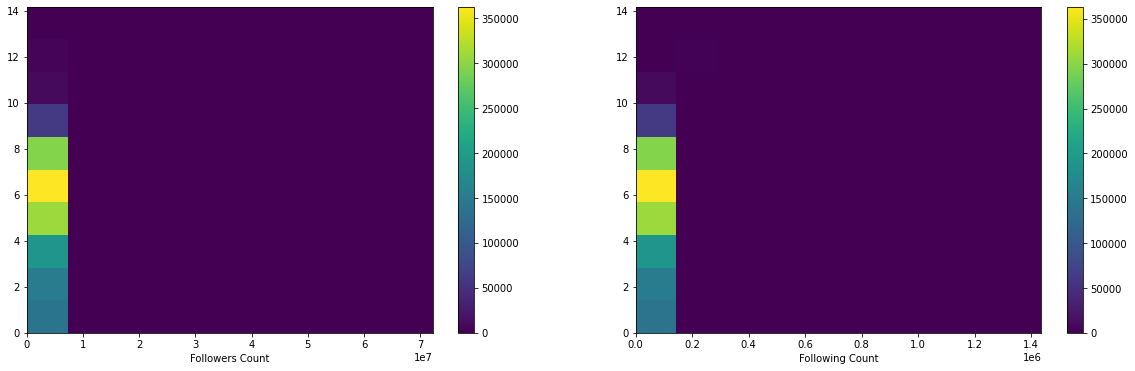

In [70]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

h1=ax[0].hist2d(df['followers_count'].loc[df['followers_count']>=0],
             df['retweet_count'].loc[df['followers_count']>=0].apply(lambda x: np.log(1+x)))
ax[0].set_xlabel("Followers Count")
fig.colorbar(h1[3], ax=ax[0])

h2=ax[1].hist2d(df['following_count'].loc[df['following_count']>=0],
             df['retweet_count'].loc[df['following_count']>=0].apply(lambda x: np.log(1+x)))
ax[1].set_xlabel("Following Count")
fig.colorbar(h2[3], ax=ax[1])


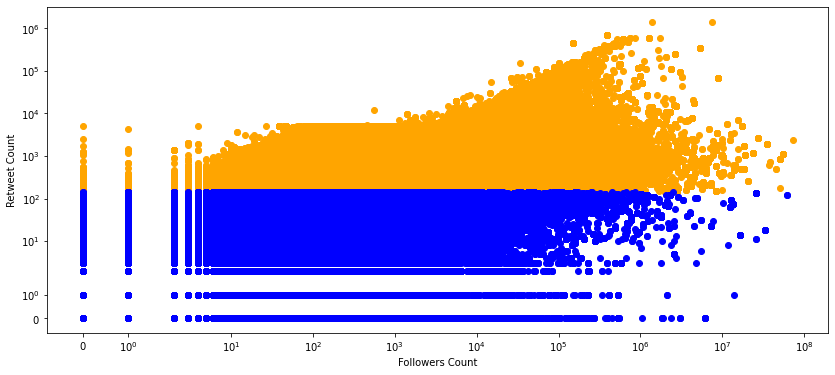

In [36]:
#Plot number of followers vs retweet count in a partitioned regime of the following count
fig, ax = plt.subplots(1, figsize=(14, 6))

ax.scatter(df['followers_count'].loc[df['following_count']>max(df['following_count'])/10000]
              ,df['retweet_count'].loc[df['following_count']>max(df['following_count'])/10000], color='orange')
ax.set_xlabel("Followers Count")
ax.set_ylabel("Retweet Count")
ax.set_yscale('symlog')
ax.set_xscale('symlog')

ax.scatter(df['followers_count'].loc[df['following_count']<max(df['following_count'])/10000]
              ,df['retweet_count'].loc[df['following_count']<max(df['following_count'])/10000], color='blue')
ax.set_xlabel("Followers Count")
ax.set_ylabel("Retweet Count")
ax.set_yscale('symlog')
ax.set_xscale('symlog')

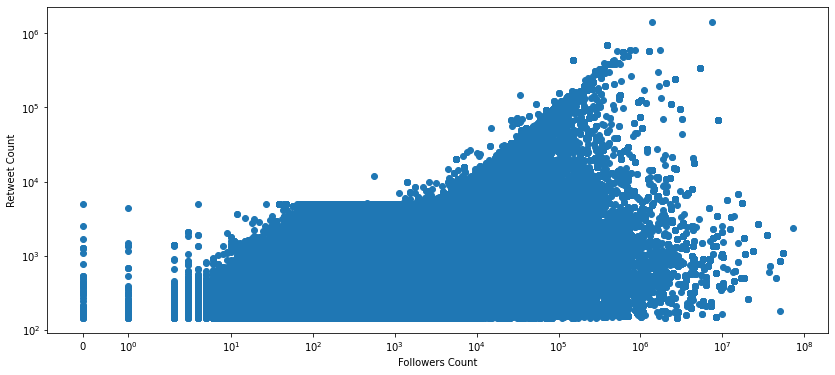

In [73]:
#Plot number of followers vs retweet count in the upper regime of the above plot
fig, ax = plt.subplots(1, figsize=(14, 6))

ax.scatter(df['followers_count'].loc[df['following_count']>max(df['following_count'])/10000]
              ,df['retweet_count'].loc[df['following_count']>max(df['following_count'])/10000],)
ax.set_xlabel("Followers Count")
ax.set_ylabel("Retweet Count")
ax.set_yscale('symlog')
ax.set_xscale('symlog')

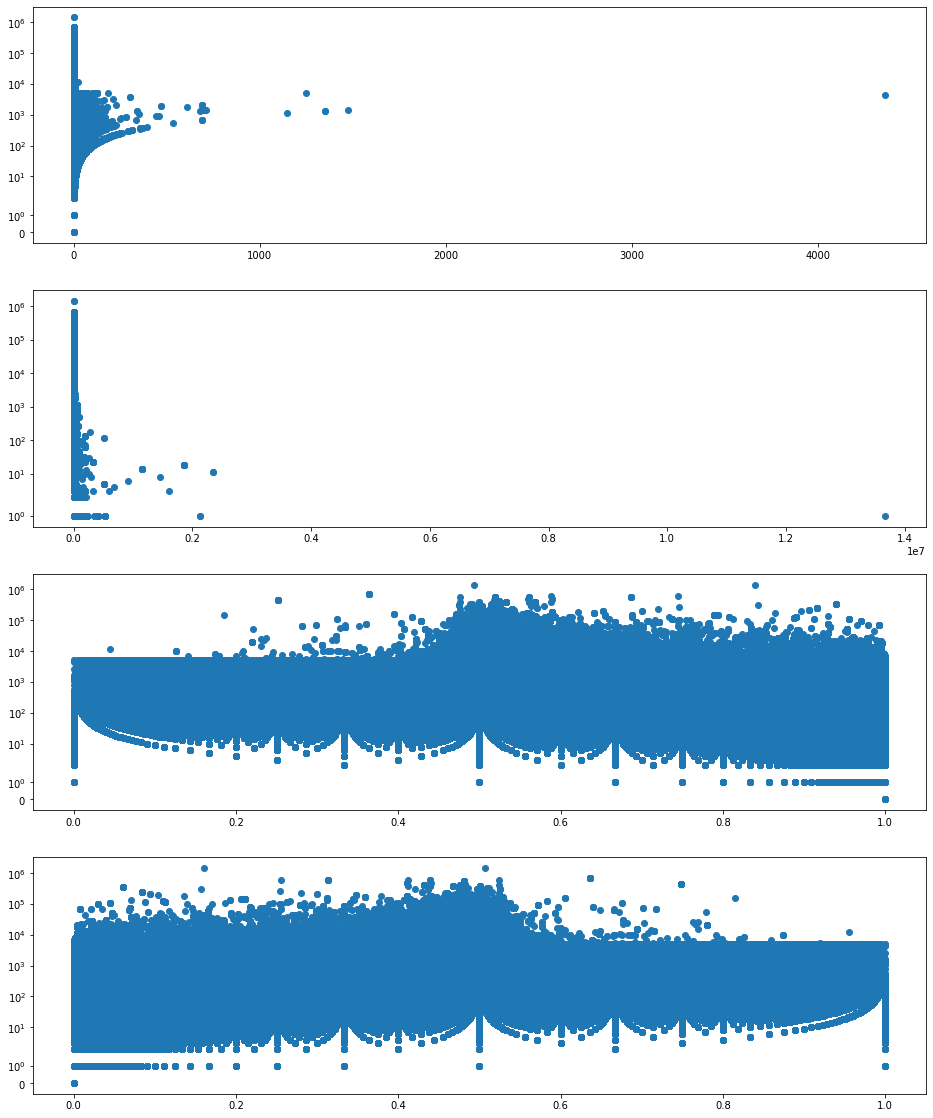

In [78]:
# Plot of the relative effects of following count and followers count on retweet count
fig, ax = plt.subplots(4,1, figsize=(16, 20))

ax[0].scatter(df['following_count']/df['followers_count'],
              df['retweet_count'])
ax[0].set_yscale('symlog')
#ax[0].set_xscale('symlog')

ax[1].scatter(df['followers_count']/df['following_count'],
             df['retweet_count'])
ax[1].set_yscale('symlog')
#ax[1].set_xscale('symlog')

ax[2].scatter(df['followers_count']/(df['following_count']
            +df['followers_count']),df['retweet_count'])
ax[2].set_yscale('symlog')
#ax[2].set_xscale('symlog')

ax[3].scatter(df['following_count']/(df['following_count']
            +df['followers_count']),df['retweet_count'])
ax[3].set_yscale('symlog')
#ax[3].set_xscale('symlog')

Text(0, 0.5, 'Number of likes within specified range')

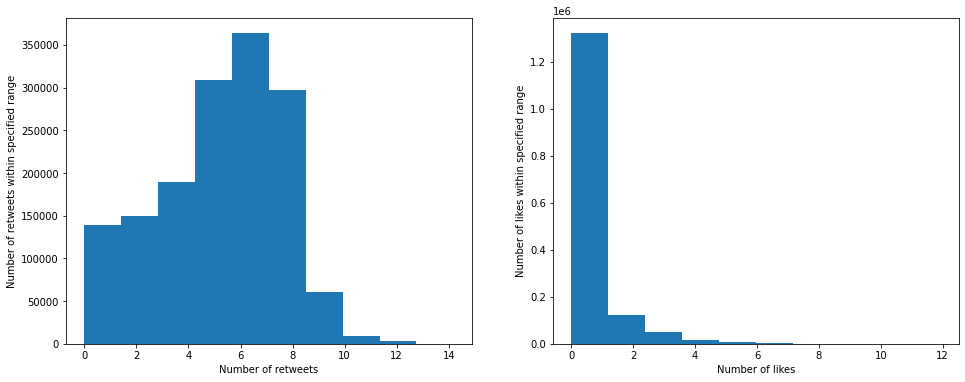

In [40]:
#Histogram plots of retweet and likes distribution
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].hist(df['retweet_count'].apply(lambda x: np.log(1+x)))
ax[0].set_xlabel("Number of retweets")
ax[0].set_ylabel("Number of retweets within specified range")

ax[1].hist(df['like_count'].apply(lambda x: np.log(1+x)))
ax[1].set_xlabel("Number of likes")
ax[1].set_ylabel("Number of likes within specified range")

## Tweet Length Effects on Popularity
In the below subsection, we study the statistics of tweet length, and we subsequently explore its effect on the resulting popularity of a tweet. 

Text(0, 0.5, 'Text length count')

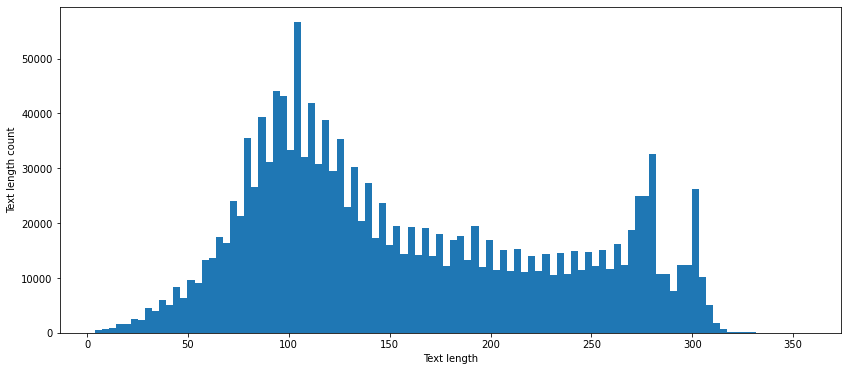

In [41]:
# Histogram plot of text length 
fig, ax = plt.subplots(1, figsize=(14, 6))
ax.hist(df['text_length'], bins=100)
ax.set_xlabel("Text length")
ax.set_ylabel("Text length count")

Text(0.5, 0, 'Text length')

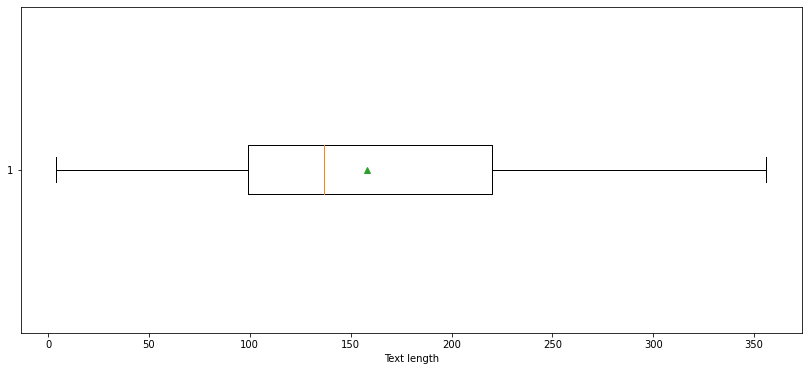

In [42]:
# Box plot of text length statistics
fig, ax = plt.subplots(1, figsize=(14, 6))
ax.boxplot(df['text_length'], vert= False, showmeans=True)
ax.set_xlabel('Text length')

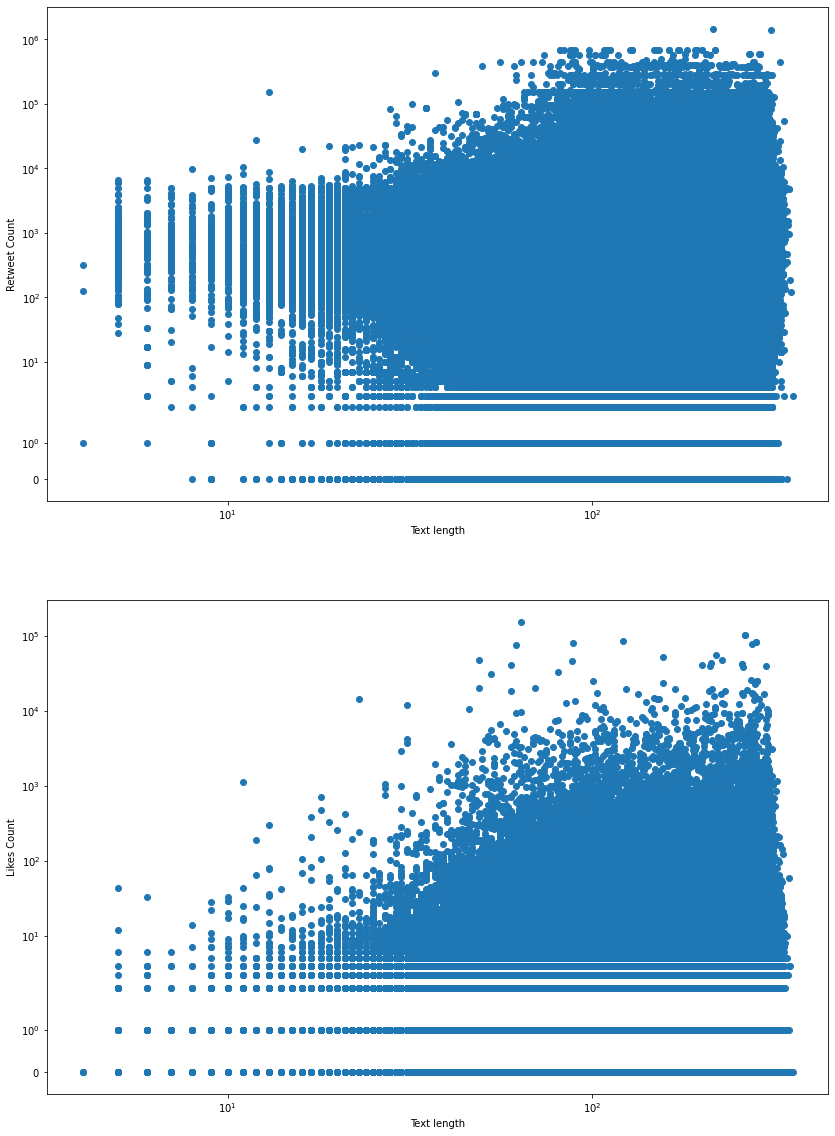

In [79]:
#Plot of text length vs retweet count and vs likes count
fig, ax = plt.subplots(2, figsize=(14, 20))

ax[0].scatter(df['text_length'],df['retweet_count'])
ax[0].set_xlabel("Text length")

ax[0].set_ylabel("Retweet Count")
ax[0].set_yscale('symlog')
ax[0].set_xscale('symlog')     


ax[1].scatter(df['text_length'],df['like_count'])
ax[1].set_xlabel("Text length")
ax[1].set_ylabel("Likes Count")
ax[1].set_yscale('symlog')
ax[1].set_xscale('symlog')    

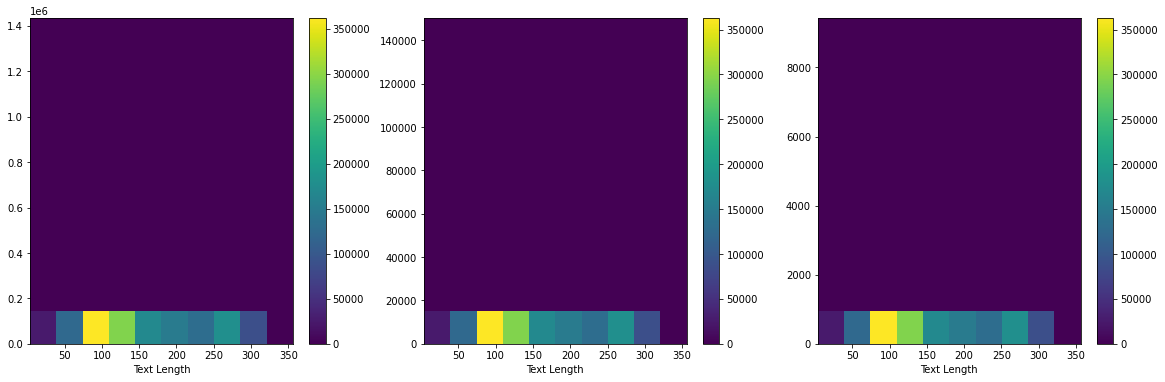

In [57]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))

h1=ax[0].hist2d(df['text_length'].loc[df['retweet_count']>=0],
             df['retweet_count'].loc[df['retweet_count']>=0])
ax[0].set_xlabel("Text Length")
fig.colorbar(h1[3], ax=ax[0])

h2=ax[1].hist2d(df['text_length'].loc[df['like_count']>=0],
             df['like_count'].loc[df['like_count']>=0])
ax[1].set_xlabel("Text Length")
fig.colorbar(h2[3], ax=ax[1])

h3 = ax[2].hist2d(df['text_length'].loc[df['quote_count']>=0],
             df['quote_count'].loc[df['quote_count']>=0])
ax[2].set_xlabel("Text Length")
fig.colorbar(h3[3], ax=ax[2])

## Tweet Sentiment Effects on Popularity
In this subsection, we analyze the statistics of the positive, negative and neutral sentiments associated with the text data as given by the Vader sentiment analysis library. Vader is particularly suited for tweet data as the library comes with built in social media/colloquial features such as slang, emojis, hashtags, etc. We also analyze the effect that these Vader sentiments have on the overall popularity paired with some of the other aforementioned features. 

Text(0, 0.5, 'Compound Vader Score Counts')

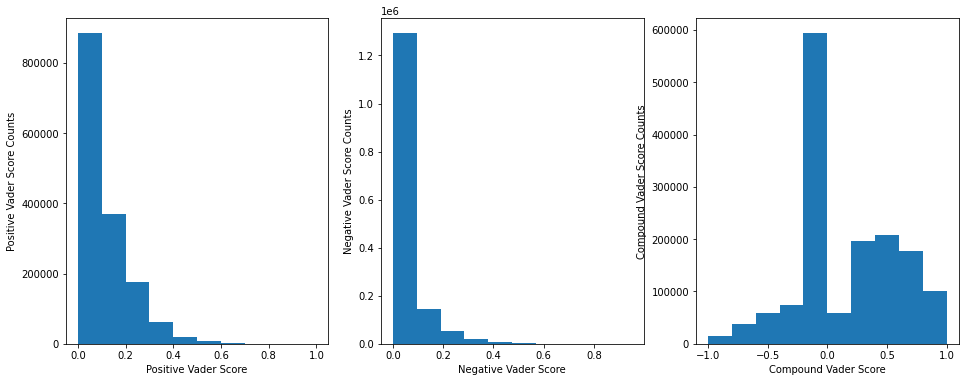

In [52]:
# Plot positive, negative and scoring sentiments in  histogram against retweet count
fig, ax = plt.subplots(1,3, figsize=(16, 6))
ax[0].hist(df['Positive_vader'])
ax[0].set_xlabel("Positive Vader Score")
ax[0].set_ylabel("Positive Vader Score Counts")


ax[1].hist(df['Negative_vader'])
ax[1].set_xlabel("Negative Vader Score")
ax[1].set_ylabel("Negative Vader Score Counts")

ax[2].hist(df['Compound_vader'])
ax[2].set_xlabel("Compound Vader Score")
ax[2].set_ylabel("Compound Vader Score Counts")

Text(0.5, 0, 'Neutral vader score')

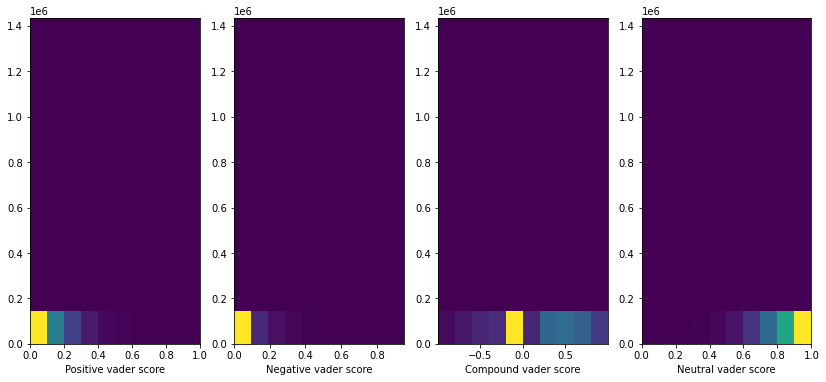

In [54]:
# Plot positive and negative scoring sentiments in 2d histogram against retweet count
fig, ax = plt.subplots(1,4, figsize=(14, 6))
ax[0].hist2d(df['Positive_vader'].loc[df['retweet_count']>=0],
             df['retweet_count'].loc[df['retweet_count']>=0])
ax[0].set_xlabel("Positive vader score")


ax[1].hist2d(df['Negative_vader'].loc[df['retweet_count']>=0],
             df['retweet_count'].loc[df['retweet_count']>=0])
ax[1].set_xlabel("Negative vader score")


ax[2].hist2d(df['Compound_vader'].loc[df['retweet_count']>=0], 
             df['retweet_count'].loc[df['retweet_count']>=0])
ax[2].set_xlabel("Compound vader score")


ax[3].hist2d(df['Neutral_vader'].loc[df['retweet_count']>=0], 
             df['retweet_count'].loc[df['retweet_count']>=0])
ax[3].set_xlabel("Neutral vader score")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


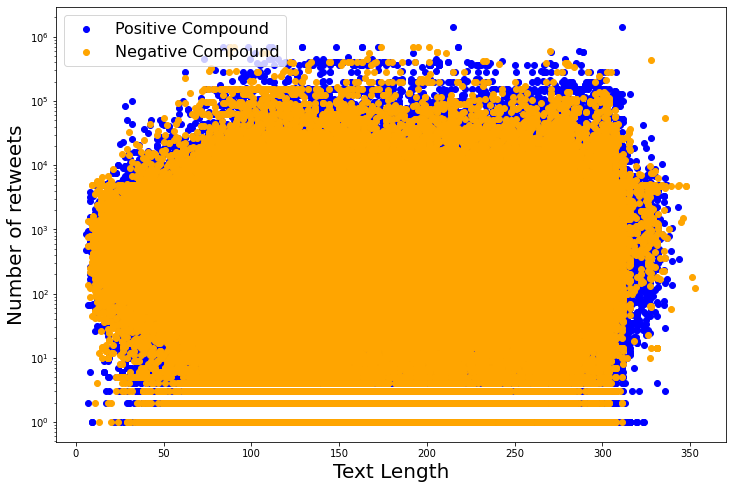

In [56]:
plt.figure(figsize=(12,8))

plt.scatter(df.loc[df['Compound_vader']>0].text_length,
               df.loc[df['Compound_vader']>0].retweet_count,
               label="Positive Compound",
               c='blue')
plt.scatter(df.loc[df['Compound_vader']<0].text_length,
               df.loc[df['Compound_vader']<0].retweet_count,
               label="Negative Compound",
               c='orange')
plt.yscale('log')
#plt.set_xscale('log') 


plt.xlabel("Text Length", fontsize=20)
plt.ylabel("Number of retweets", fontsize=20)
plt.legend(fontsize=16)

In [71]:
df[df['followers_count']<2]

,author_id,created_at,entities_cashtags,entities_hashtags,entities_urls,tweet_id,possibly_sensitive,like_count,quote_count,reply_count,...,followers_count,following_count,listed_count,tweet_count,media_type,Compound_vader,Positive_vader,Negative_vader,Neutral_vader,text_length
44,1109077952422014978,2021-09-30 19:06:01,NaN,"3Mer,","bit.ly/3F7Mlzx,",1443713773097816064,False,0.0,0.0,0,...,0.0,11.0,0,701,NaN,0.9448,0.329,0.000,0.671,257
61,1402464359591276549,2021-09-30 18:49:03,NaN,NaN,"ebay.com/itm/2944302367…, pic.twitter.com/fHtU...",1443709506559504421,False,0.0,0.0,0,...,1.0,7.0,0,9061,photo,0.0000,0.000,0.000,1.000,123
167,1109077952422014978,2021-09-30 17:09:01,NaN,"Proud3Mer,","bit.ly/3ilZXh6,",1443684330169978880,False,0.0,0.0,0,...,0.0,11.0,0,701,NaN,0.7906,0.265,0.000,0.735,195
233,1432756222797783042,2021-09-30 16:12:57,NaN,"Proud3Mer,","bit.ly/3F7tNzx,",1443670219847700487,False,0.0,0.0,0,...,1.0,52.0,0,12,NaN,0.8550,0.244,0.000,0.756,184
267,1109077952422014978,2021-09-30 15:33:39,NaN,"3Mer,","bit.ly/3F4tyoR,",1443660332090593280,False,0.0,0.0,0,...,0.0,11.0,0,701,NaN,0.7269,0.167,0.054,0.779,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519185,1425207657263255554,2021-09-23 23:58:21,NaN,NaN,"listia.com/r2skhf3/DRTBHJ,",1441250627791687681,False,0.0,0.0,0,...,0.0,14.0,0,4,NaN,0.6588,0.161,0.000,0.839,188
1519397,1262399953818836994,2021-09-22 15:33:26,NaN,NaN,"r.blastmylisting.com/sm/188191, pic.twitter.co...",1440761173582835715,False,0.0,0.0,0,...,1.0,0.0,0,159,photo,0.0000,0.000,0.000,1.000,124
1519756,1262399953818836994,2021-09-20 12:33:28,NaN,NaN,"r.blastmylisting.com/sm/188189, pic.twitter.co...",1439991107090325508,False,0.0,0.0,0,...,1.0,0.0,0,159,photo,0.4215,0.123,0.000,0.877,140
1519782,1432322445545861123,2021-09-20 10:07:49,NaN,NaN,"pic.twitter.com/oPQRZi5fJ3,",1439954454493769729,False,0.0,0.0,0,...,0.0,5.0,0,741,photo,-0.9750,0.036,0.364,0.600,300


In [4]:
analyser = SIA()


def vader_tweet_sentiment(tweetframe):
    """
    This function computes the sentiment scores for a dataframe
    with pre-processed tweets
    :param tweetframe: dataframe with text info
    :return: A data frame with sentiment scores added
    """
    scores = []
    # Declaring the variables used for scoring
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Get the compound positive, neutral, and negative sentiment
    # scores for the tweet dataframe
    for i in range(tweetframe['text'].shape[0]):
        compound = analyser.polarity_scores(tweetframe['text'][i])['compound']
        pos = analyser.polarity_scores(tweetframe['text'][i])['pos']
        neu = analyser.polarity_scores(tweetframe['text'][i])['neu']
        neg = analyser.polarity_scores(tweetframe['text'][i])['neg']
        scores.append({"Compound_vader": compound,
                       "Positive_vader": pos,
                       "Negative_vader": neg,
                       "Neutral_vader": neu})
    # Convert the Vader sentiment scores into a dataframe
    sentiment_scores = pd.DataFrame.from_dict(scores)
    tweetframe = tweetframe.join(sentiment_scores)
    return tweetframe